# Data Preparation and Advanced Model Evaluation

## Agenda

**Data preparation**

- Handling missing values
- Handling categorical features (review)

**Advanced model evaluation**

- ROC curves and AUC
- Bonus: ROC curve is only sensitive to rank order of predicted probabilities
- Cross-validation

## Part 1: Handling missing values

scikit-learn models expect that all values are **numeric** and **hold meaning**. Thus, missing values are not allowed by scikit-learn.

In [1]:
# read the Titanic data
import pandas as pd
path = '/Users/jim_byers/Documents/GA/GA_Data_Science_course/SEA-DAT1/data/'
url = path + 'titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.shape

(891, 11)

In [2]:
# check for missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

One possible strategy is to **drop missing values**:

In [3]:
# drop rows with any missing values
titanic.dropna().shape

(183, 11)

In [4]:
titanic.dropna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [5]:
# drop rows where Age is missing
titanic[titanic.Age.notnull()].shape

(714, 11)

Sometimes a better strategy is to **impute missing values**:

In [6]:
# mean Age
titanic.Age.mean()

29.69911764705882

In [7]:
# median Age
titanic.Age.median()

28.0

In [8]:
# most frequent Age
titanic.Age.mode()

0    24
dtype: float64

In [9]:
# fill missing values for Age with the median age
titanic.Age.fillna(titanic.Age.median(), inplace=True)
titanic.shape

(891, 11)

Another strategy would be to build a **KNN model** just to impute missing values. How would we do that?

If values are missing from a categorical feature, we could treat the missing values as **another category**. Why might that make sense?

How do we **choose** between all of these strategies?

## Part 2: Handling categorical features (Review)

How do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

In [10]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,28,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S


In [11]:
# Create and encode Female feature
titanic['Female'] = titanic.Sex.map({'male':0, 'female':1})

In [12]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0


In [13]:
# create a DataFrame of dummy variables for Embarked
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
titanic = pd.concat([titanic, embarked_dummies], axis=1)

In [14]:
titanic.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S,0,0,1


- How do we **interpret** the encoding for Embarked?
- Why didn't we just encode Embarked using a **single feature** (C=0, Q=1, S=2)?
- Does it matter which category we choose to define as the **baseline**?
- Why do we only need **two dummy variables** for Embarked?

In [15]:
# define X and y
feature_cols = ['Pclass', 'Parch', 'Age', 'Female', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
y = titanic.Survived

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.793721973094


## Part 3: ROC curves and AUC

In [16]:
# predict probability of survival
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
#print(y_pred_prob)

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

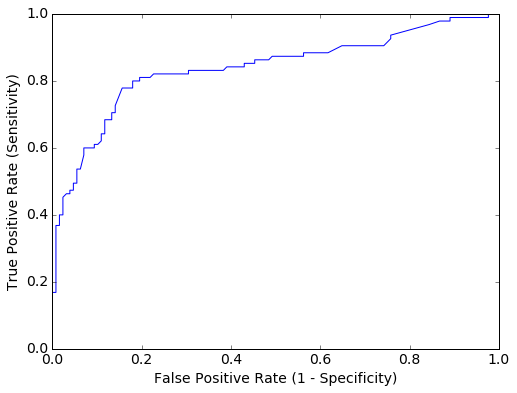

In [18]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
#print(metrics.roc_curve(y_test, y_pred_prob))

In [19]:
# calculate AUC
print metrics.roc_auc_score(y_test, y_pred_prob)

0.838692434211


Seeing the ROC curve and calculate AUC allows you to see the quality of the model and in comparison to other models.

Once satisfied with the estimator and parameter choices, you choose the threshold that best **balances sensitivity and specificity** based on the level of need to favor one over the other.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11075a1d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1130ffd90>], dtype=object)

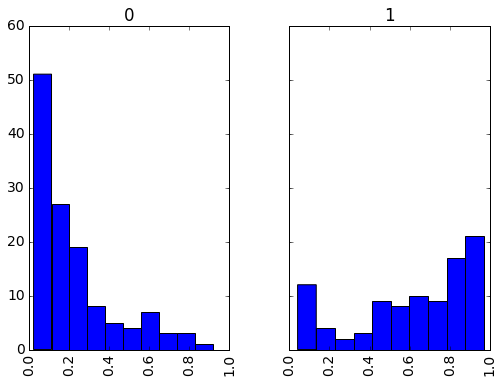

In [20]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame({'probability':y_pred_prob, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True)

What would have happened if you had used **y_pred_class** instead of **y_pred_prob** when drawing the ROC curve or calculating AUC?

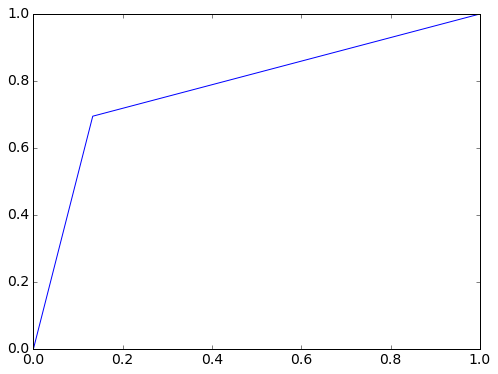

In [21]:
# ROC curve using y_pred_class - WRONG!
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)

In [22]:
# AUC using y_pred_class - WRONG!
print metrics.roc_auc_score(y_test, y_pred_class)

0.780962171053


If you use **y_pred_class**, it will interpret the zeros and ones as predicted probabilities of 0% and 100%.

## Bonus: ROC curve is only sensitive to rank order of predicted probabilities

In [23]:
# print the first 10 predicted probabilities
y_pred_prob[:10]

array([ 0.84499504,  0.07452708,  0.85089451,  0.62517563,  0.87679784,
        0.09611295,  0.13614005,  0.90132984,  0.61102777,  0.62517563])

In [24]:
# take the square root of predicted probabilities (to make them all bigger)
import numpy as np
y_pred_prob_new = np.sqrt(y_pred_prob)

# print the modified predicted probabilities
y_pred_prob_new[:10]

array([ 0.91923612,  0.27299648,  0.92243944,  0.79068048,  0.93637484,
        0.31002088,  0.36897161,  0.94938393,  0.78168265,  0.79068048])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113650350>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1136ec5d0>], dtype=object)

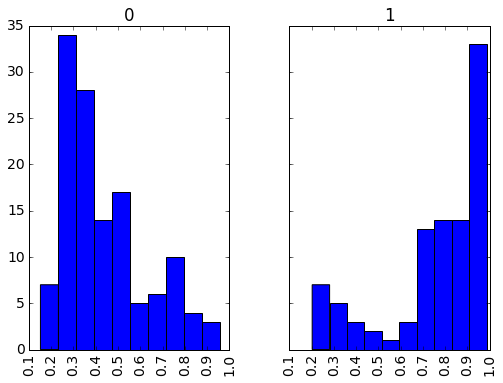

In [25]:
# histogram of predicted probabilities has changed
df = pd.DataFrame({'probability':y_pred_prob_new, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True)

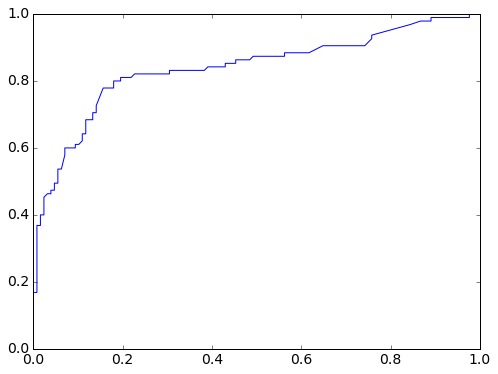

In [26]:
# ROC curve did not change
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_new)
plt.plot(fpr, tpr)

In [27]:
# AUC did not change
print metrics.roc_auc_score(y_test, y_pred_prob_new)

0.838692434211


## Part 4: Cross-validation

In [28]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.84782357185298385

In [29]:
# Evaluate adding other features.  Add Fare to the model
feature_cols = ['Pclass', 'Parch', 'Age', 'Female', 'Embarked_Q', 'Embarked_S', 'Fare']
X = titanic[feature_cols]

# recalculate AUC
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.84604951475539703

In [ ]:
#Bonus: Create a hypothetical passenger and make a prediction with the best model
